<h1><center>Winter 2021 Data Science Challenge</center></h1>

## Question 1 {-}
**Given some sample data, write a program to answer the following:**

**On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.**

To set up, I will import the libraries I will use for this question and load the given data:

In [1]:
# I will be using the following libraries in this question:
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import statistics as st

In [2]:
# load in the data as a dataframe
sneakers_df = pd.read_csv("DataScienceInternChallengeDataSet.csv")
sneakers_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


**a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

First, I will consider how the naive calculation was made.

By definition, Average Order Value (AOV) is defined a: $$\text{AOV}=\frac{\text{Revenue}}{\text{Number of Orders}}$$

In [16]:
# Use the AOV formula on the dataset
print(sum(sneakers_df['order_amount'])/len(sneakers_df.index))

3145.128


So, I've confirmed that the naive result is equivalent to the result of a direct application of the AOV formula; there is no error in calculation. 

Then, this naive result is troubling for other reasons. Let us observe the box plot:

{'whiskers': [<matplotlib.lines.Line2D at 0x2a6765c9790>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6765c9e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6765c9430>],
 'medians': [<matplotlib.lines.Line2D at 0x2a6765e1550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6765e1850>],
 'means': []}

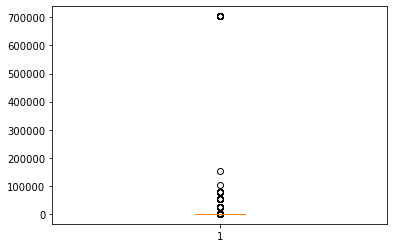

In [4]:
# Basic boxplot
plt.boxplot(sneakers_df['order_amount'])

This boxplot reveals that there are many outliers of high values in the data. As the AOV includes all values in the data with equal weight, these outliers hold notable influence over the final result. The AOV is a type of mean calculation, and means are notably sensitive to extreme datapoints; for a dataset such as this one, I would prefer a different metric to measure average.

In part b), I will discuss alternative more preferable metrics given this boxplot; but for the remainder of part a), I will discuss improving the AOV value to better represent the dataset. 

To better represent the data using the AOV, we need to either remove or lower the influence of the outliers on the dataset. First, we must identify the outlier values; typically, we consider values outside three standard deviations of the mean to be an outlier.

In [5]:
# Find the bounds of outliers
mean = st.mean(sneakers_df['order_amount'])
outlier_margin = 3*mt.sqrt(st.variance(sneakers_df['order_amount']))
outlier_lower = mean - outlier_margin
outlier_upper = mean + outlier_margin
print([outlier_lower, outlier_upper])

[-120702.49004636414, 126992.74604636413]


Since the lower bound is a negative value, which is outside the possible value for an order value, we can ignore this bound when filtering for outliers. So, a sample of the outliers are:

In [6]:
# Check that a sample of these values show they are significantly higher than previous data samples
sneakers_df[sneakers_df['order_amount'] > outlier_upper].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00


Just briefly skimming over these values and comparing them to what we had seen earlier, not only is the amount much larger, the total items for many of these rows being 2000 is a notable outlier from the rest of the data.

Now, we could choose to eliminate these outliers or replace them. To avoid losting the data completely, I would consider replacing the values of these outliers with the outlier upper bound. So, in case we choose to model this data in the future, we can keep the shape of the distrbution while reducing the influence of outliers. I will add a new column that we can use for the AOV calculation to this dataset:

In [7]:
# Add a new column where the value of the order_amount can be replaced (avoid overwriting the original column to avoid data loss) 
sneakers_df.insert(len(sneakers_df.columns), 'order_amount_replaced_outliers', sneakers_df['order_amount'])
sneakers_df = pd.concat([sneakers_df[sneakers_df['order_amount'] <= outlier_upper],
                        sneakers_df[sneakers_df['order_amount'] > outlier_upper].assign(order_amount_replaced_outliers=outlier_upper)])
sneakers_df.head()
# Calculate how much of the data are outliers
print("Percentage of Outliers:", len(sneakers_df[sneakers_df['order_amount'] > outlier_upper].index)/len(sneakers_df.index))

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_replaced_outliers
0,1,53,746,224,2,cash,2017-03-13 12:36:56,224.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


Percentage of Outliers: 0.0036


{'whiskers': [<matplotlib.lines.Line2D at 0x2a677de9a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6775ac070>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6775da910>],
 'medians': [<matplotlib.lines.Line2D at 0x2a6775ef8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6775b8dc0>],
 'means': []}

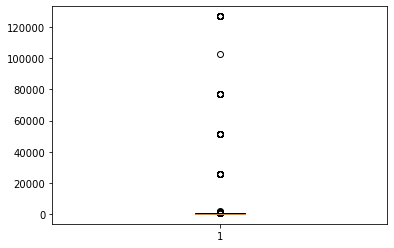

In [13]:
# Updated boxplot
plt.boxplot(sneakers_df['order_amount_replaced_outliers'])

The boxplot now has notably less extreme outliers than it previously held. However, there are still many notably high values. We could consider breaking down the 2000 items to the average amount of items per order:

In [14]:
# Average items per order
st.mean(sneakers_df['total_items'])

8.7872

Then, we could divide the cost to find the average cost for about 9 items. However, I feel that doing so should require the advice of someone with more expertise for these shoe orders - while 2000 shoes is an extreme amount, perhaps it's being bought by individuals with specific purposes such as reselling, donating to a community, or if they are getting some form of discount for their large purchases. Though there are few of these individuals in the data, I don't know if there could be more individuals who choose to do this in the future, and if it would then no longer be an outlier. I feel that breaking down the orders of 2000 could destroy some of the integrity of the mean order value, so the advice of an expert in the reasoning for these orders would be helpful to decide how this data should be approached.

As for now, I am not an expert so I will the alterations I make to the original dataset and leave the orders of 2000 shoes as they are. So, my new AOV calculation is:

In [9]:
# Use the AOV formula on the updated dataset
print(sum(sneakers_df['order_amount_replaced_outliers']/len(sneakers_df.index)))

1177.8318857669142


This value is still quite high; evidently the outliers are still exerting some influence over the mean. From here, it could be helpful to consult an expert as mentioned earlier to either break down the orders of 2000 shoes or to lower the upper outlier bound.

**b) What metric would you report for this dataset?**

We can see from the boxplots in part a) that this data is susceptible to outliers and that they can be quite extreme, relative to where most of the data lies. Below, observe a histogram of the original data:

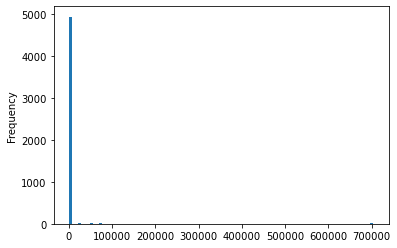

In [23]:
sneakers_df['order_amount'].plot.hist(bins=100)

So, we can see that there exist few but significant outliers of large values. This, I suggest that it would be a better idea to report a more robust measure; a very simple robust measure of average is the median.

For this data, simply taking the median order value can give a better sense of where most of the data is centered. This way, even if more outliers are introduced, the median is not sensitive to these extreme values.

**c) What is its value?**

In [15]:
# Find the median order value
st.median(sneakers_df['order_amount'])

284.0

The median order value is $284.

## Question 2 {-}

**Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.**

**a) How many orders were shipped by Speedy Express in total?**

    Query: SELECT COUNT(*) FROM Orders 
           WHERE ShipperID=
                (SELECT ShipperID FROM Shippers 
                WHERE ShipperName="Speedy Express");
    Result: 54

**b) What is the last name of the employee with the most orders? **

    Query: SELECT LastName FROM Employees 
           WHERE EmployeeID=
                (SELECT EmployeeID FROM
                    (SELECT EmployeeID, MAX(empCount) FROM 
                        (SELECT EmployeeID, COUNT(*) AS empCount 
                        FROM Orders GROUP BY EmployeeID)));
    Result: Peacock

**c) What product was ordered the most by customers in Germany?**

    Query: SELECT ProductName FROM Products WHERE ProductID=
                (SELECT ProductID FROM 
                    (SELECT ProductID, MAX(orderCount) FROM 
                        (SELECT ProductID, SUM(Quantity) AS orderCount 
                        FROM OrderDetails WHERE OrderID IN 
                            (SELECT OrderID FROM Orders Where CustomerID IN 
                                (SELECT CustomerID FROM Customers WHERE Country="Germany"))
                         GROUP BY ProductID)))
        
    Result: Boston Crab Meat